In [2]:
# !pip install pillow
from bs4 import BeautifulSoup
import requests
import sqlite3
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image 
import numpy as np
import jieba


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:



#sql database

conn = sqlite3.connect('h1.db')

url = 'https://www.nkust.edu.tw/p/403-1000-12-{}.php'
html = requests.get(url).text


sel = '#pageptlist > div> div > div > div > div'


sel_content1 ='#Dyn_2_3 > div.module.module-detail.md_style1 > div > section > div.mcont > div.mpgdetail > p'
sel_con = '#Dyn_2_3 > div.module.module-detail.md_style1 > div > section > div.mcont > div.mpgdetail > p:nth-child({})'
all_content = []
for i in range(1, 42):
    url1 = url.format(i)
    html = requests.get(url1).text
    soup  =BeautifulSoup(html, 'html.parser')
    date = soup.select(sel)
    for item in date:
        url_item = item.a['href']
      
        item_url = requests.get(url_item).text
   
        item_soup  =BeautifulSoup(item_url, 'html.parser')
        item_content = item_soup.select(sel_content1)

        try:
            for content in item_content:
   
                sqlstr = "insert into h1('text') values('{}')".format(str(content.text.strip()))
            
                conn.execute(sqlstr)
                all_content.append(str(content.text.strip()))
        except Exception:
            continue


        time.sleep(3)
    
       
conn.commit()
conn.close()
print('done')
    
    

# for i in range(1, 42):
#     allurl.append(url.format(i))
# # print(allurl)

In [ ]:

conn = sqlite3.connect("/content/drive/MyDrive/h1.db")
db = conn.excuete('SELECT * FROM news')
contexts = db.fetchall()

data = []

for c in contexts:
    word = data.append(c[0])
data = ','.join(data)

stopwords = list()
while open('/content/drive/MyDrive/stopWords.txt', 'r', encoding='utf-8') as fp:
    for word in contexts
        stopwords = [word for word in fp.readlines()]

jieba.load_userdict('user')    
    
    

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/python_tutorial/h1.db')
rows=  conn.execute('select * from h1')
data = rows.fetchall()
words = list()
stopwords = []
with open('/content/drive/MyDrive/python_tutorial/stopWords.txt','rt', encoding='utf-8') as fp:
    stopwords = [word.strip() for word in fp.readlines()]
# print(stopwords)
jieba.load_userdict('/content/drive/MyDrive/python_tutorial/userDict.txt')
for item in data:
  
  words.append(item[1])
words = ','.join(words)
print(words)
print(jieba.cut(words))
keyterms = [key_word for key_word in jieba.cut(words) if key_word !=' ' and key_word != stopwords]


text = ",".join(keyterms)


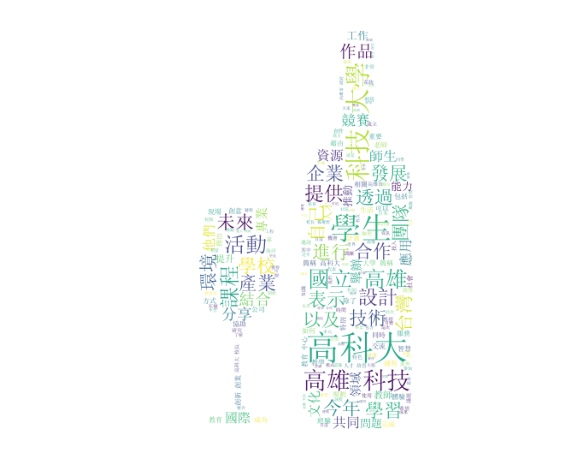

In [73]:
mask = np.array(Image.open('/content/drive/MyDrive/python_tutorial/cup.png'))
wordcloud = WordCloud(background_color="white",
                      width=838, height=835, 
                      margin=1, font_path="/content/drive/MyDrive/python_tutorial/simsun.ttf", 
                      mask=mask).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()